# Mellors MSDS 610 Week 4 Assignment

<img align="right" style="padding-left:50px;" src="figures_wk4/data_cleaning.png" width=350><br>
### User Bias in Data Cleaning
For your homework assignment this week, we will explore how our treatment of our data can impact the quality of our results.

**Dataset:**
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs.

A list of the corresponding survey questions can be found [here](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html).

 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pd.set_option('display.float_format', '{:.0f}'.format) 

In [3]:
df= pd.read_csv('survey_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         211 non-null    object 
 9   q9         3047 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28026 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


In [5]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Assignment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

[Add as many code cell below here as needs]


# Part 1: Column Names

In [6]:
df.columns = ["timestamp",
              "q1_age",
              "q2_industry",
              "q3_title",
              "q4_job_summary",
              "q5_salary",
              "q6_addtl_funds",
              "q7_currency",
              "q8_addtl_currency_type",
              "q9_addtl_income_context",
              "q10_country",
              "q11_us_state",
              "q12_city",
              "q13_work_exp_yrs",
              "q14_field_exp_yrs",
              "q15_education",
              "q16_gender",
              "q17_race"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                28108 non-null  object 
 1   q1_age                   28108 non-null  object 
 2   q2_industry              28033 non-null  object 
 3   q3_title                 28107 non-null  object 
 4   q4_job_summary           7273 non-null   object 
 5   q5_salary                28108 non-null  object 
 6   q6_addtl_funds           20793 non-null  float64
 7   q7_currency              28108 non-null  object 
 8   q8_addtl_currency_type   211 non-null    object 
 9   q9_addtl_income_context  3047 non-null   object 
 10  q10_country              28108 non-null  object 
 11  q11_us_state             23074 non-null  object 
 12  q12_city                 28026 non-null  object 
 13  q13_work_exp_yrs         28108 non-null  object 
 14  q14_field_exp_yrs     

# PART 2: EDA

### Q1 - Age: EDA

In [8]:
df.q1_age.value_counts()

q1_age
25-34         12668
35-44          9908
45-54          3193
18-24          1236
55-64           994
65 or over       95
under 18         14
Name: count, dtype: int64

<AxesSubplot: xlabel='q1_age'>

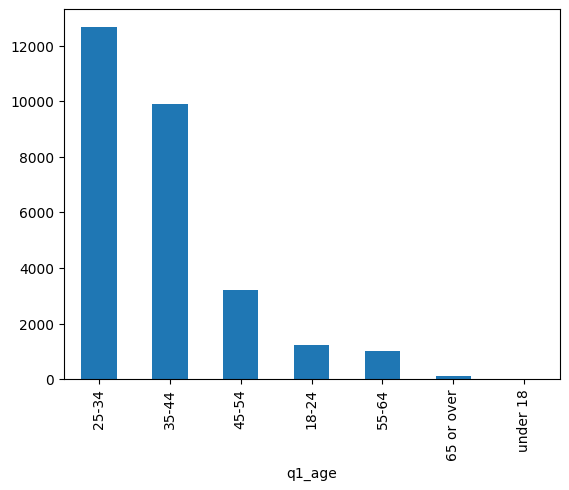

In [9]:
df.q1_age.value_counts().plot(kind='bar')

In [10]:
df.q1_age.describe()

count     28108
unique        7
top       25-34
freq      12668
Name: q1_age, dtype: object

**Notes:** 
- No missing data
- Uneven class distribution 
- data in buckets
- All answers within the buckets - no outliers

### Q2 - Industry: EDA

In [11]:
df.q2_industry.describe()

count                 28033
unique                 1220
top       Computing or Tech
freq                   4711
Name: q2_industry, dtype: object

In [12]:
df.q2_industry.isnull().sum()

75

In [13]:
df.q2_industry.value_counts()

q2_industry
Computing or Tech                          4711
Education (Higher Education)               2466
Nonprofits                                 2420
Health care                                1899
Government and Public Administration       1893
                                           ... 
Gaming (Gambling)                             1
Regulatory Affairs- nutraceuticals            1
Manufacturing : corporate admin support       1
Real Estate Investment Support                1
Social networks                               1
Name: count, Length: 1220, dtype: int64

**Notes**

- 75 missing values
- 1220 Unique responses
- (Possible): Consider combining some responses? Too Long

### Q3 - Title: EDA

In [14]:
df.q3_title.isnull().sum()

1

In [15]:
df.q3_title.describe()

count                 28107
unique                14377
top       Software Engineer
freq                    286
Name: q3_title, dtype: object

In [16]:
df.q3_title.sample(15)

3264                              Family Therapist
20972                                HR Generalist
17668                            Program Assistant
4988                          Supply Chain Manager
21606                              Product Manager
20009                  Paralegal, Trusts & Estates
414      Senior employee communications specialist
8626                      Senior Software Engineer
16124                                  Electrician
21971                                     DC Admin
7944                             Library Associate
5772                                        Lawyer
21045           Associate Director/Program Officer
10935                      Public Affairs Officer 
25494                      Solid waste technician 
Name: q3_title, dtype: object

**Notes:**
- One missing value: consider filling in based on similar features.
- Unique Values = 14337 / 28107
- Likely not a very valuable column due to unique count.
- Related to "Industry" column


### Q4 - Job Summary: EDA

In [17]:
df.q4_job_summary.isnull().sum()

20835

In [18]:
df.q4_job_summary.dropna().sample(10)

23961            Project Manager for commercial furniture 
4858                    Enterprise level customer service 
5243     I run a program to build the technology and pr...
2252                 Senior level attorney but non-partner
1109      I work in Finance for an educational institution
10880                             For a research institute
15504                                       Federal Agency
5976     This job is B2B customer service in a call cen...
10544                                   Operations manager
5896                                             Doctorate
Name: q4_job_summary, dtype: object

**Notes:**
- 20835 NULL values, very little valuable data
- Impossible/improbable to clean

### Q5 - Salary: EDA

In [19]:
df.q5_salary.isnull().sum()

0

In [20]:
df.q5_salary.info()

<class 'pandas.core.series.Series'>
RangeIndex: 28108 entries, 0 to 28107
Series name: q5_salary
Non-Null Count  Dtype 
--------------  ----- 
28108 non-null  object
dtypes: object(1)
memory usage: 219.7+ KB


In [21]:
df.q5_salary.describe()

count      28108
unique      4319
top       60,000
freq         430
Name: q5_salary, dtype: object

**Notes:**

- No NULLs
- Labeled as object (likely due to commas): remove symbols and change to float or in64 (for outliers)
- Consider creating buckets due to the large "unique" count
- Consider Corr Matrix for relational features. 
- Consider looking for outliers after changing Dtype

### Q6 - Additional Funds (addtl_funds): EDA

In [22]:
df.q6_addtl_funds.isnull().sum()

7315

In [23]:
df.q6_addtl_funds.describe()

count       20793
mean        18245
std        833625
min             0
25%             0
50%          2000
75%         10000
max     120000000
Name: q6_addtl_funds, dtype: float64

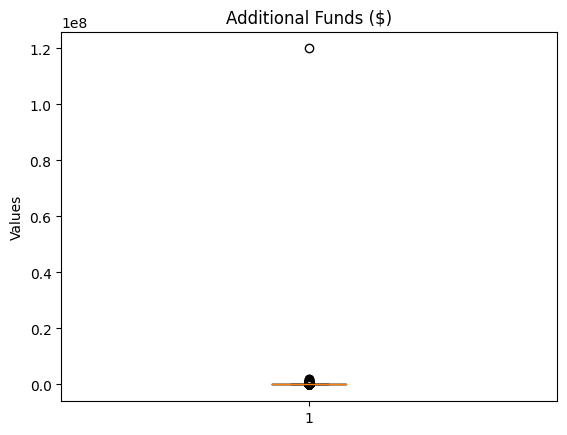

In [24]:
plt.boxplot(df.q6_addtl_funds.dropna())
plt.title("Additional Funds ($)")
plt.ylabel("Values")
plt.show()

**Notes:**

- 7315 NULLs
- float type: good
- Consider changing NULLs to "0" or median
- 1 possible outlier: 120,000,000 (compare to similar titles/industry and currency type); impute
- Consider new feature: "total_compensation" (salary + additional funds)

### Q7 - Currency Type (currency): EDA

In [25]:
df.q7_currency.isnull().sum()

0

In [26]:
df.q7_currency.value_counts()

q7_currency
USD        23410
CAD         1675
GBP         1592
EUR          646
AUD/NZD      504
Other        164
CHF           37
SEK           37
JPY           23
ZAR           16
HKD            4
Name: count, dtype: int64

<AxesSubplot: xlabel='q7_currency'>

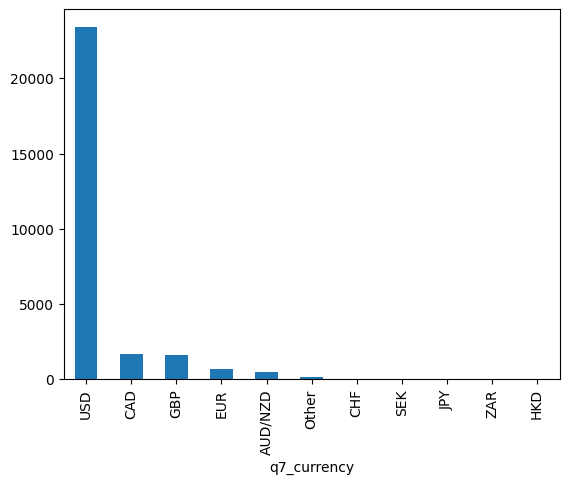

In [27]:
df.q7_currency.value_counts().plot(kind="bar")

**Notes:**

- No NULLs
- Datatype = int64 | good
- Class disparity, otherwise clean
- Compare "other" to feature: addtl_currency_type

### Q8 - Additional Currency Types (addtl_currency_type): EDA

In [28]:
df.q8_addtl_currency_type.isna().sum()

27897

In [29]:
df.q8_addtl_currency_type.notna().sum()

211

In [30]:
df.q8_addtl_currency_type.value_counts()

q8_addtl_currency_type
INR                                       11
SGD                                       11
USD                                       11
NOK                                       10
DKK                                        8
                                          ..
US Dollar                                  1
AUD & NZD are not the same currency...     1
55,000                                     1
ILS/NIS                                    1
TZS                                        1
Name: count, Length: 124, dtype: int64

**Notes:**
- 27,897 missing values - low importance, likely directly related to "currency".
- Contains options that can be reclassified in "currency" (i.e. "US Dollar" = "USD")
- Contains text "AUD & NZD are not the same..."
- Contains currency amount (i.e. 55,000)
- Consider looking at "like" types ("currency") and change
- Consider merging "addtl_currency_types" with "currency"

### Q9 - Additional Income Context (addtl_income_context): EDA

In [31]:
df.q9_addtl_income_context.describe()

count       3047
unique      2983
top       Hourly
freq           4
Name: q9_addtl_income_context, dtype: object

In [32]:
df.q9_addtl_income_context.value_counts()

q9_addtl_income_context
Hourly                                                                                                 4
Bonus not guaranteed                                                                                   3
Stock                                                                                                  3
10 month employee                                                                                      3
Before tax                                                                                             3
                                                                                                      ..
My income is salaried but weekly hourly expectations are 55-60 hours per week.                         1
I only work part time, so my actual take-home pay is closer to $40k/year.                              1
Additional compensation is calculated as % of my annual salary based on the company annual results     1
I'm paid minimum wage for my pr

In [33]:
df.q9_addtl_income_context.isna().sum()

25061

**Notes:**

- text based
- 25,061 NULL values, low value feature
- Consider dropping, cleaning impossible/improbable

### Q10 - Country: EDA

In [34]:
df.q10_country.isna().sum()

0

In [35]:
df.q10_country.value_counts()

q10_country
United States      9004
USA                7946
US                 2612
Canada             1572
United States       668
                   ... 
IS                    1
United Kingdomk       1
 New Zealand          1
Cuba                  1
Česká republika       1
Name: count, Length: 382, dtype: int64

**Notes:**

- No NULLs
- 382 unique values
- Synonomous values (i.e. United States, US, USA)
- Consider combining synonomous values
- Class imbalance (United States = majority class)

### Q11 - State (us_state): EDA

In [36]:
df.q11_us_state.sample(10)

6934     North Carolina
1928                NaN
20296           Wyoming
24949               NaN
817          California
20390           Georgia
17362               NaN
15761               NaN
348       Massachusetts
17974          Michigan
Name: q11_us_state, dtype: object

In [37]:
df.q11_us_state.isna().sum()

5034

In [38]:
df.q11_us_state.value_counts()

q11_us_state
California                                 2611
New York                                   2174
Massachusetts                              1522
Texas                                      1269
Illinois                                   1213
                                           ... 
Alaska, Idaho, Oregon, Utah, Washington       1
Arizona, California, Nevada, Texas            1
Illinois, Kentucky                            1
Illinois, Wisconsin                           1
Florida, Georgia                              1
Name: count, Length: 137, dtype: int64

**Notes:**

- 5,034 NAs - likely related to non-US countries (check against 'country'/'city')
- 137 unique values 
- Consider reducing multiple listed states to one state - first listed
- Consider filling NAs with "Not Applicable"

### Q12 - City : EDA

In [39]:
df.q12_city.value_counts()

q12_city
Boston                   772
Chicago                  752
New York                 711
Seattle                  691
London                   576
                        ... 
Ethel                      1
Concord, CA                1
charlottesville            1
A major Canadian city      1
Dar es Salaam              1
Name: count, Length: 4841, dtype: int64

In [40]:
df.q12_city.isna().sum()

82

In [41]:
df.q12_city.sample(15)

10503          Monterey
26369           Mission
22989            London
15080          New York
27064         vancouver
22316    Loudoun County
26695           Atlanta
19306          New York
22156        Brookfield
7811             Boston
372              Denver
20103        Sacramento
15645           Chicago
12247     North Andover
27367           Atlanta
Name: q12_city, dtype: object

**Note:**
- 82 NULLs - consider "Not Applicable" or compare to "state"
- 4,841 unique entries
- Consider looking for text strings and replace

### Q13 - Years of Work Experience (work_exp_yrs) : EDA

In [42]:
df.q13_work_exp_yrs.isna().sum()

0

In [43]:
df.q13_work_exp_yrs.nunique()

8

In [44]:
df.q13_work_exp_yrs.value_counts()

q13_work_exp_yrs
11 - 20 years       9630
8 - 10 years        5381
5-7 years           4886
21 - 30 years       3645
2 - 4 years         3038
31 - 40 years        870
1 year or less       533
41 years or more     125
Name: count, dtype: int64

<AxesSubplot: xlabel='q13_work_exp_yrs'>

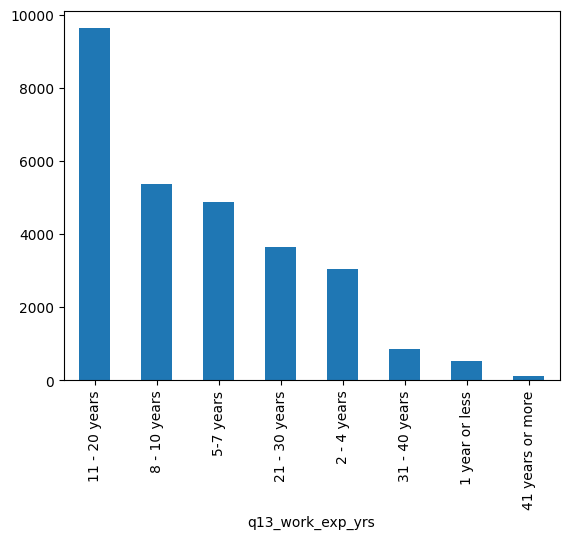

In [45]:
df.q13_work_exp_yrs.value_counts().plot(kind="bar")

In [46]:
df.q13_work_exp_yrs.describe()

count             28108
unique                8
top       11 - 20 years
freq               9630
Name: q13_work_exp_yrs, dtype: object

**Notes:**
- No NULLs
- All options fall into one of 8 buckets.
- "41 or more years" possible outlier, due to few results, but still good data
- Consider smaller buckets, else: No recommendations/considerations
- Likely related to salary feature

### Q14 - Years of Experience in Current Field (field_exp_yrs)

In [47]:
df.q14_field_exp_yrs.isna().sum()

0

In [48]:
df.q14_field_exp_yrs.nunique()

8

In [49]:
df.q14_field_exp_yrs.value_counts()

q14_field_exp_yrs
11 - 20 years       6542
5-7 years           6524
2 - 4 years         6263
8 - 10 years        4984
21 - 30 years       1870
1 year or less      1500
31 - 40 years        384
41 years or more      41
Name: count, dtype: int64

<AxesSubplot: xlabel='q14_field_exp_yrs'>

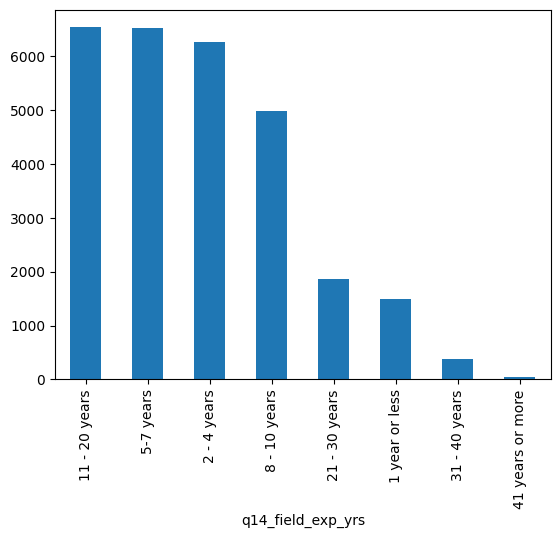

In [50]:
df.q14_field_exp_yrs.value_counts().plot(kind="bar")

In [51]:
df.q14_field_exp_yrs.describe()

count             28108
unique                8
top       11 - 20 years
freq               6542
Name: q14_field_exp_yrs, dtype: object

**Notes:**

- No NULLs
- 11-20 years majority counts (6,540)
- All inputs fall into oneof 8 buckets
- "41 or more years" possible outlier, due to few results, but still good data
- Consider smaller buckets, else: No recommendations/considerations

### Q15 - Education : EDA

In [52]:
df.q15_education.isna().sum()

223

In [53]:
df.q15_education.nunique()

6

In [54]:
df.q15_education.value_counts()

q15_education
College degree                        13536
Master's degree                        8879
Some college                           2075
PhD                                    1427
Professional degree (MD, JD, etc.)     1325
High School                             643
Name: count, dtype: int64

**Notes:**

- 223 NULLs - Consider adding "Not Applicable" or average degree for industry
- 6 unique identifiers

### Q16 - Gender: EDA

In [55]:
df.q16_gender.isna().sum()

171

In [56]:
df.q16_gender.nunique()

5

In [57]:
df.q16_gender.value_counts()

q16_gender
Woman                            21389
Man                               5502
Non-binary                         747
Other or prefer not to answer      298
Prefer not to answer                 1
Name: count, dtype: int64

**Notes:**
- 171 NULLs
- 5 responses, 2 = Other or Prefer Not to answer
- Consider reducing options (combine "non-binary" and "other or prefer not to answer")
- Reclassify  "prefer not to answer" - not a legitimate response on survey.
- Add NULLs to Prefer not to answer
- Class imbalance (majority = Woman)

### Q17 Race: EDA

In [58]:
df.q17_race.isna().sum()

177

In [59]:
df.q17_race.nunique()

51

In [60]:
df.q17_race.value_counts()

q17_race
White                                                                                                                                                                                                                           23235
Asian or Asian American                                                                                                                                                                                                          1410
Black or African American                                                                                                                                                                                                         694
Another option not listed here or prefer not to answer                                                                                                                                                                            625
Hispanic, Latino, or Spanish origin                                    

**Notes:**
- 177 NULLs
- 51 unique values (survey only has 7 options, users selected multiple options)
- Consider adding NULLs to "Another option not..." 
- Consider reclassifying multiples to the single first entry or new feature "mixed race"
- Class imbalance: (majority = White)

## EDA SUMMARY

**Question:** How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).

Overall, I think the dataset is quite informative, with some notable exceptions to usefulness and value. Additionally, most of the columns weren't missing any data, which meant that all participants chose to answer must of the questions in full. There was as some exception to this, especially with features like "state" and "q4_job_summary" where the thousands of entries were missing. There were very few that only had a small handful of missing values (under 10), with the majority of them missing hundreds of entries. For the ones that were missing the majority of the data, I classified them as low value columns - meaning that they provide little insight and imputing would be difficult (such as q4_job_summary). Others, like "q11_us_state" had over 5,000 missing values, but that could be attributed to the fact that not all participants reside in the U.S. For some of the ones that are missing a couple hundred, I could impute them based on their mean responses or based on relevant features, for instance, I could impute the missing "q15_education" with the most common degree in the respective fields (and go even deeper by the most relevant degree for the amount of years of experfience in the field). Other missing fields could actually be easily reclassified, for instance, in "q16_gender" all the NULLs can be reclassified to the already existing option of "other or prefer not to say". each feature with NULLs is going to be handled differently, since imputing something like the "mean" wouldn't work for all, nor would it make sense.

Other than noting the NULLs, there was 1 notable outlier (outside of real-world outliers, like very few participants having over 40 yrs experience) in the additional income, where the individual listed 120,000,000 in additional income - not impossible, just unlikely - so this will need to be imputed. Dicussing real-world outliers, such as years of work experience, this can skew the data (or underrepresent a particular group), so I am considering making smaller buckets for certain categories to make a more even distributed category. Additionally, there were a few questions where the responses had synonomous answers (i.e. country: "United States", "US", "U.S."). These synononyms can skew the data and need to be reclassified so that there is only one representation for all synonyms of a particular catergory. There are also some features I labeled as low value, and I think should be considered for dropping (i.e. title: too many unique values; additional income context: to few entries). Along with considering dropping columns, there was a tleast one isntance where I thought a new feature should be added: "total compensation", which would be a sum of the salary and additional funds (I think this is a better representation of someone's networth). As far as the dataset is concerned, there are definitely "messy" aspects, but was surprisingly more thorough in results than I would have anticipated for an online survey. 

# Part 3: The Plan

Now, it is time to plan how you will clean up the dataset. You **are not** allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)

**Question:** Based on your EDA above, detail how you would clean up this dataset. 
Things to consider: (This is not an exhaustive list)
- Are there columns that can't be effectively cleaned? If so, why?
- Are there columns that genuinely won't have a data value?
- Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?
- Are outliers a factor in this dataset?

Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.

**How I am going to clean the data:**

As I did some EDA on each column and took notes on considerations when cleaning the data, I am going to follow the same format and work on each column (if necessary, as I already identified some columns I thought that were thoroughly clean) and clean it up the best I can, either through imputing, research, or correlation. Additionally, I will drop columns that are of informationally low value and reduce unique values when necessary. I have listed above all my considerations, but this a break down of each feature and what I am going to consider for each (and I will do them chronologically, manipulating other features as I go, if necessary).

 **timestamp**  
 - No data manipulation needed.
 
 **q1_age**
 - No data manipulation, EDA provided evidence nothing further was needed
 
 **q2_industry**  
 - Fill in the NULLs (75), fill in with generic text (75 entries in the dataset is small, so I don't think it will sway the data).
 - No other manipulations identified
 
 **q3_title**  
 - Fill in the 1 NULL, by looking at similar columns 
 - No other manipulations identified
 
 **q4_job_summary**   
 - Drop this column because of very few responses and I believe the information is of low value.  
 
 
 **q5_salary**  
 - There is outliers, will look into how to address them, if not US currency, doing the currency exchange, 
         if U.S. imputing for similar industry, titles, field experience, etc.
 - Convert to numbers, because they are floats (with commas)
 
 
 **q6_addtl_fund**  
 - Fill in NULLs with "0", since I can assume that if they have none to add, that they have none to list
 - Impute outliers the same as with salary
 
 **q7_currency**  
 - Look for synonymous (or repeat) currency types and convert, the goal is to reduce unique values to the fewest necessary currency types
 
 **q8_addtl_currency_type**   
 - This had very few responses, and could be low value, given the number of unique values. However, I am opting to clean this one up
 - Look for synonymous (or repeat) currency types and convert.
 - Fill NULLs with generic text (i.e. "Not Relevant")
  
 **q9_addtl_income_context**   
 - Drop this column because of very few responses and I believe the information is of low value.  
 
 **q10_country**  
 - No NULLs to handle
 - Look for synonymous (or repeat) currency types and convert, the goal is to reduce unique values to the fewest necessary currency types.

 **q11_us_state**  
 - There is alot of NULLs (5,034), so I am opting to add generic text (i.e. "Not Relevant") to handle the amount
 - Check that all of the Non-Null options match one or more of the U.S. states.
 
 **q12_city**   
 - There are 82 NULLs, I am opting to use generic text, as this low of a number I don't feel like will sway the data. Individual line items can be addressed if needed during data analysis.
 - Check that the cities all make sense.
 
**q13_work_exp_yrs**   
- Initial EDA confirmed that I don't feel the need for any data manipulation for this column.

**q14_field_exp_yrs**
- Initial EDA confirmed that I don't feel the need for any data manipulation for this column.

**q15_education** 
- Fill in the NULLs with "like" education, based on industry, salary, years of experience, etc.

**q16_gender** 
- Reduce the options to the survey options (there are 5 values in the dataset, but only 4 options on the survey)
- Add NULLs to the "Other or prefer not to answer" value, as not answering is the same as preferring not to answer.

**q17_race**   
- Add NULLs to the "Another option not listed here or prefer not to answer" value
- Combine mixed answers to a new value called "Mixed Race" for better representation of underrepresented mixed race folks.

**Note:** I have also provided additional notes in my implementation phase, for a deeper understanding of what I was doing and my thought process. I may decide, as I am doing my manipulation, to detour from what is listed based on new findings or other factors.

# Part 4: Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

[Add as many code cell below here as needs]

### Q2 - Industry: Clean Up

I am opting to fill in the missing values (75) for industry because each one is unique and it would be very time consuming to go through and try to determine each one. Also, since there is only 75 missing values, I don't feel that the data would be skewed by having a "No Response" given the data frame has over 28,000 entries.

- Personal Bias: by choosing to use filler text, as opposed to researching each NULL by hand, I am adding a personal bias.

In [61]:
df.q2_industry = df.q2_industry.fillna("No Response")

In [62]:
df.q2_industry.isnull().sum()

0

### Q3 - Title: Clean Up

There is only one missing value, and even though the title feature has quite a few unique values, I am going to attempt to find a close contender so that I can come up with an educated assessment. Much like the industry feature, the low amount of NAs (1) means that even if I put filler text it likely wouldn't skew the data. But, I want to see if I can come up with something more than filler - since it is only 1 NA.

the one NAN for title is a student (according to their "q2_industry" response). So I am going to relable their title as "student"

In [63]:
df[df.q3_title.isna()]

,timestamp,q1_age,q2_industry,q3_title,q4_job_summary,q5_salary,q6_addtl_funds,q7_currency,q8_addtl_currency_type,q9_addtl_income_context,q10_country,q11_us_state,q12_city,q13_work_exp_yrs,q14_field_exp_yrs,q15_education,q16_gender,q17_race
27996,11/29/2023 19:59:34,18-24,I'm currently a student and don't have a job,NaN,I don't have one right now,0,0,USD,NaN,There is no income right now,U.S.A,Pennsylvania,NaN,2 - 4 years,2 - 4 years,Some college,Man,Black or African American


In [64]:
df.q3_title = df.q3_title.fillna("student")

In [65]:
df.q3_title.isnull().sum()

0

### Q4 - Job Summary: Clean Up

This field is for text strings and is missing over 20,800 out of a 28,108 data set. I am opting to treat this field as of low informational value. As such, and due to the fact that the vast majority of participants skipped this feature, I am opting to delete the feature.

In [66]:
df.q4_job_summary.isnull().sum()

20835

In [67]:
df.drop(columns=['q4_job_summary'], inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                28108 non-null  object 
 1   q1_age                   28108 non-null  object 
 2   q2_industry              28108 non-null  object 
 3   q3_title                 28108 non-null  object 
 4   q5_salary                28108 non-null  object 
 5   q6_addtl_funds           20793 non-null  float64
 6   q7_currency              28108 non-null  object 
 7   q8_addtl_currency_type   211 non-null    object 
 8   q9_addtl_income_context  3047 non-null   object 
 9   q10_country              28108 non-null  object 
 10  q11_us_state             23074 non-null  object 
 11  q12_city                 28026 non-null  object 
 12  q13_work_exp_yrs         28108 non-null  object 
 13  q14_field_exp_yrs        28108 non-null  object 
 14  q15_education         

### Q5 - Salary: Clean Up

There is one notable outlier where the salary was listed as 6,000,070,000. To resolve this, I am going to isolate the participant who listed this salary and I am going to look for any similar industry/titles to figure out a good salary to impute this one to.

After looking into similar titles, I found one other entry with the same exact title, "Investment Banking Analyst" in the same field. The other one listed had a salary of 100,000 U.S. dollars, so I did a conversion (USD to CAD, since the outlier was in CAD) and got ~$143,000 CAD and I set that as the new salary for the outlier. After resolving this outlier another one appeared - So I did a list in descending order to look for more possible outliers.

Upon additional EDA, the top salaries (outliers) are in a foriegn currency (IDR - Indonesian Rupiah, COP - Colombian Peso). These foriegn currencies have a very high exchange rate - for instance the IDR is 16,289 rupiahs to 1 U.S. dollar, so an IDR of 870,000,000 is equal to 53,405 U.S. dollars. Additionally, the respondee had a title of "Regional Operations & Training Manager" and was over 55 years old, so it could be reasonable that this individual was being honest and they just are a real-world example of an outlier. Since the top salaries are really high and doing each one by hand would be too time consuming, I am opting to reclassify the highest one - which is a true outlier, even for the currency type (IDR).

My recommendation would be that if salary is the goal for the data analytics, to seperate the dataset based on  the currency type. Without the numbers being converted based on currency exchange, the salaries are not a great reflection without the other relevant features. To really clean up the data, it would require going through every instance that isn't a us dollar and doing each conversion by hand.

- Personal Bias: By not manually changing every non U.S. dollar to a U.S. dollar, I am adding bias by knowing that the currency are not all the same currency type.

In [69]:
df.q5_salary.describe()

count      28108
unique      4319
top       60,000
freq         430
Name: q5_salary, dtype: object

In [70]:
df.q5_salary.value_counts()

q5_salary
60,000    430
80,000    406
70,000    402
65,000    400
75,000    383
         ... 
69,888      1
97,129      1
83,600      1
52,260      1
279000      1
Name: count, Length: 4319, dtype: int64

In [71]:
df.q5_salary = pd.to_numeric(df['q5_salary'].str.replace(r'[\$,]', '', regex=True))

In [72]:
df.q5_salary.value_counts()

q5_salary
60000       591
70000       571
65000       563
80000       560
75000       544
           ... 
207500        1
79612         1
264000        1
58635         1
24000000      1
Name: count, Length: 3671, dtype: int64

In [73]:
df.q5_salary.nunique()

3671

In [74]:
df.q5_salary.describe()

count        28108
mean        361932
std       36193377
min              0
25%          54000
50%          75000
75%         109827
max     6000070000
Name: q5_salary, dtype: float64

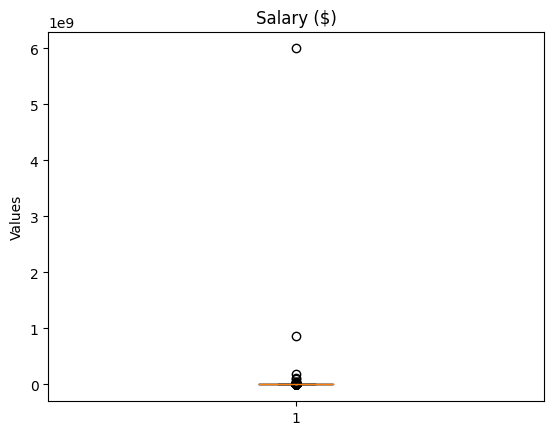

In [75]:
plt.boxplot(df.q5_salary.dropna())
plt.title("Salary ($)")
plt.ylabel("Values")
plt.show()

In [76]:
df[df['q5_salary'] == 6000070000]

,timestamp,q1_age,q2_industry,q3_title,q5_salary,q6_addtl_funds,q7_currency,q8_addtl_currency_type,q9_addtl_income_context,q10_country,q11_us_state,q12_city,q13_work_exp_yrs,q14_field_exp_yrs,q15_education,q16_gender,q17_race
28055,7/12/2024 18:25:27,18-24,"Accounting, Banking & Finance",Investment Banking Analyst,6000070000,NaN,CAD,NaN,NaN,Canada,NaN,Toronto,2 - 4 years,1 year or less,College degree,Woman,Black or African American


In [77]:
df[df['q3_title'] == 'Investment Banking Analyst']

,timestamp,q1_age,q2_industry,q3_title,q5_salary,q6_addtl_funds,q7_currency,q8_addtl_currency_type,q9_addtl_income_context,q10_country,q11_us_state,q12_city,q13_work_exp_yrs,q14_field_exp_yrs,q15_education,q16_gender,q17_race
18665,4/29/2021 1:40:03,25-34,"Accounting, Banking & Finance",Investment Banking Analyst,100000,44000,USD,NaN,Bonus is 20-100% of salary,U.S.,Texas,Houston,2 - 4 years,2 - 4 years,College degree,Woman,White
28055,7/12/2024 18:25:27,18-24,"Accounting, Banking & Finance",Investment Banking Analyst,6000070000,NaN,CAD,NaN,NaN,Canada,NaN,Toronto,2 - 4 years,1 year or less,College degree,Woman,Black or African American


In [78]:
df.loc[df.q5_salary == 6000070000, 'q5_salary'] = 143000

In [79]:
df.q5_salary.describe()

count       28108
mean       148473
std       5405540
min             0
25%         54000
50%         75000
75%        109827
max     870000000
Name: q5_salary, dtype: float64

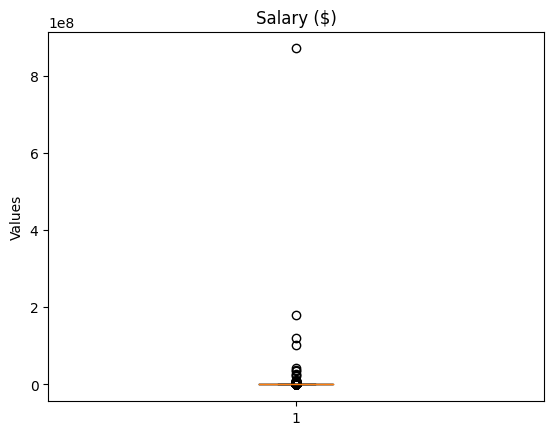

In [80]:
plt.boxplot(df.q5_salary.dropna())
plt.title("Salary ($)")
plt.ylabel("Values")
plt.show()

In [81]:
df.sort_values(by='q5_salary', ascending=False)

,timestamp,q1_age,q2_industry,q3_title,q5_salary,q6_addtl_funds,q7_currency,q8_addtl_currency_type,q9_addtl_income_context,q10_country,q11_us_state,q12_city,q13_work_exp_yrs,q14_field_exp_yrs,q15_education,q16_gender,q17_race
11454,4/28/2021 1:31:57,55-64,Education (Higher Education),Regional Operations & Training Manager,870000000,120000000,Other,IDR,NaN,Indonesia,NaN,Jakarta,21 - 30 years,11 - 20 years,College degree,Woman,White
18984,4/29/2021 6:19:32,25-34,Education (Higher Education),Researcher,180000000,NaN,Other,IDR,NaN,Indonesia,NaN,Bandung,5-7 years,2 - 4 years,PhD,Man,Asian or Asian American
27902,11/15/2022 18:24:41,35-44,No Response,Senior IT Consultant,120000000,NaN,Other,COP,NaN,Colombia,NaN,Bogota,11 - 20 years,8 - 10 years,College degree,Man,"Hispanic, Latino, or Spanish origin"
3605,4/27/2021 12:11:17,25-34,Utilities & Telecommunications,Operations Manager,102000000,NaN,USD,COP,Colombian peso - converting to usd it seems lo...,Colombia,NaN,Bogota,8 - 10 years,1 year or less,Some college,Man,"Hispanic, Latino, or Spanish origin"
23490,5/3/2021 4:17:58,35-44,Law,Legal Editor,43800000,150000,Other,KRW,The bonuses I receive are in the form of gift ...,South Korea,NaN,Seoul,5-7 years,5-7 years,Master's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13537,4/28/2021 13:01:52,25-34,Education (Primary/Secondary),Student teacher,0,0,USD,NaN,Student teaching is usually unpaid,USA,Connecticut,New. Haven,2 - 4 years,2 - 4 years,Master's degree,Woman,"Middle Eastern or Northern African, White"
8739,4/27/2021 16:34:56,35-44,Stay-at-home parent,"""mum"" ;)",0,0,USD,NaN,NaN,US,Kentucky,Louisville,21 - 30 years,8 - 10 years,Master's degree,Woman,White
27829,6/13/2022 4:47:22,25-34,Homemaker,Homemaker,0,0,USD,NaN,NaN,United States,California,Morgan Hill,5-7 years,2 - 4 years,College degree,Woman,White
28020,3/19/2024 17:40:39,25-34,Student,Student,0,0,USD,NaN,NaN,US,Illinois,NaN,1 year or less,1 year or less,College degree,Other or prefer not to answer,White


In [82]:
df.loc[df.q5_salary == 870000000, 'q5_salary'] = 53404

In [83]:
df.loc[df.q5_salary == 53404, 'q7_currency'] = "USD"

In [84]:
df.q5_salary.describe()

count       28108
mean       117522
std       1516200
min             0
25%         54000
50%         75000
75%        109717
max     180000000
Name: q5_salary, dtype: float64

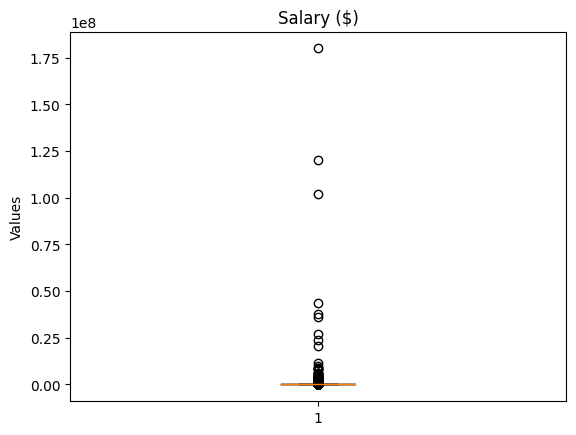

In [85]:
plt.boxplot(df.q5_salary.dropna())
plt.title("Salary ($)")
plt.ylabel("Values")
plt.show()

# Q6 - Additional Funds: Clean Up

There is one notable outlier, and it looks like it was one of the same ones from the salary. So I am going to do the same thing and convert their additional funds into USD (I already changed the currency type for it). Addiitonally, due to alot of NANs, I am going to fill them with 0, as I imagine that they do not have additional funds to add.

In [86]:
df.q6_addtl_funds.isnull().sum()

7315

In [87]:
df.q6_addtl_funds = df.q6_addtl_funds.fillna(0)

In [88]:
df.q6_addtl_funds.isnull().sum()

0

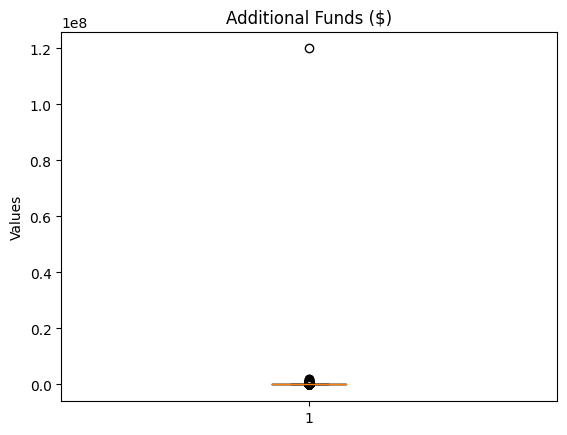

In [89]:
plt.boxplot(df.q6_addtl_funds.dropna())
plt.title("Additional Funds ($)")
plt.ylabel("Values")
plt.show()

In [90]:
df.q6_addtl_funds.describe()

count       28108
mean        13497
std        717032
min             0
25%             0
50%             0
75%          5000
max     120000000
Name: q6_addtl_funds, dtype: float64

In [91]:
df[df['q6_addtl_funds'] == 120000000]

,timestamp,q1_age,q2_industry,q3_title,q5_salary,q6_addtl_funds,q7_currency,q8_addtl_currency_type,q9_addtl_income_context,q10_country,q11_us_state,q12_city,q13_work_exp_yrs,q14_field_exp_yrs,q15_education,q16_gender,q17_race
11454,4/28/2021 1:31:57,55-64,Education (Higher Education),Regional Operations & Training Manager,53404,120000000,USD,IDR,NaN,Indonesia,NaN,Jakarta,21 - 30 years,11 - 20 years,College degree,Woman,White


In [92]:
df.loc[df.q6_addtl_funds == 120000000, 'q6_addtl_funds'] = 7368

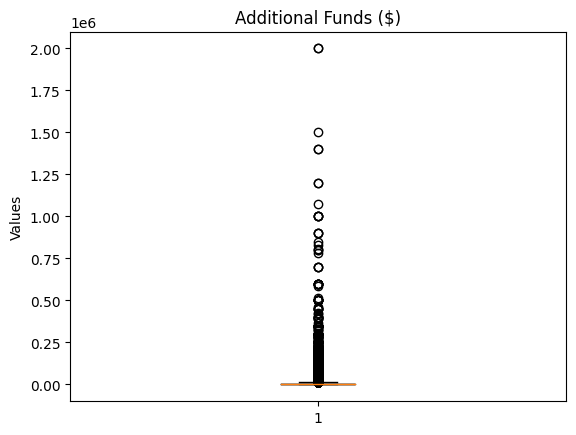

In [93]:
plt.boxplot(df.q6_addtl_funds.dropna())
plt.title("Additional Funds ($)")
plt.ylabel("Values")
plt.show()

### Q8 - Currency Types: Clean Up

There are a number of strings of text and multiple of the same currencies. I am going to go through and try to reduce them to the minimum amount of currency types as needed. I am going to go one-by-one and look up currency ISO codes to reclassify the ones I need to.

After doing the above, I was able to reduce the number of unique values from 124 to 42 -- all currency types. I also filled in the NANs with "Not Applicable".

In [94]:
df.q8_addtl_currency_type.isnull().sum()

27897

In [95]:
df.q8_addtl_currency_type = df.q8_addtl_currency_type.fillna("Not Applicable")

In [96]:
df.q8_addtl_currency_type.isnull().sum()

0

In [97]:
df.q8_addtl_currency_type.describe()

count              28108
unique               125
top       Not Applicable
freq               27897
Name: q8_addtl_currency_type, dtype: object

In [98]:
df.q8_addtl_currency_type.value_counts()

q8_addtl_currency_type
Not Applicable                            27897
SGD                                          11
USD                                          11
INR                                          11
NOK                                          10
                                          ...  
AUD & NZD are not the same currency...        1
55,000                                        1
ILS/NIS                                       1
Norwegian kroner (NOK)                        1
TZS                                           1
Name: count, Length: 125, dtype: int64

In [99]:
df.q8_addtl_currency_type.unique()

array(['Not Applicable', 'INR', 'Peso Argentino', '$76,302.34',
       'My bonus is based on performance up to 10% of salary',
       'I work for an online state university, managing admissions data. Not direct tech support. ',
       '0', 'MYR', 'CHF', 'KWD', 'NOK', 'Na ', 'USD', 'BR$', 'SEK',
       'Base plus Commission ', 'canadian', 'Dkk', 'EUR', 'COP', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'GBP', 'DKK',
       'Bdt', 'RSU / equity', 'ZAR', 'Additonal = Bonus plus stock',
       'American Dollars', 'Php', 'PLN (Polish zloty)',
       'Overtime (about 5 hours a week) and bonus', 'czech crowns',
       'Stock ', 'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS',
       '55,000', 'AUD & NZD are not the same currency...', 'US Dollar',
       'Canadian ', 'AUD', 'BRL', 'NIS (new Israeli shekel)', '-',
       'RMB (chinese yuan)', 'Taiwanese dollars',
       "AUD and NZD aren't the same currency, and have absolutely nothing to do with each other :(",
       

In [100]:
df.loc[df.q8_addtl_currency_type == '$76,302.34', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'My bonus is based on performance up to 10% of salary', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'I work for an online state university, managing admissions data. Not direct tech support. ', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == '0', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Na ', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Base plus Commission ', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Additonal = Bonus plus stock', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'USD', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'American Dollars', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Overtime (about 5 hours a week) and bonus', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == '55,000', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'AUD & NZD are not the same currency...', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'US Dollar', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Canadian ', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == "AUD and NZD aren't the same currency, and have absolutely nothing to do with each other :(", 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == '6000 in stock grants annually', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Many non-salary benefits - travel, free healthcare for self, very low for family, non-taxable housing allowance ', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'It’s marketed as £22000 but we get paid pro-rats, so no pay for the school holidays.', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'additional compensation is for overtime (i am paid hourly) so it varies. i have included an estimate', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Argentinian peso (ARS)', 'q8_addtl_currency_type'] = "ARS"
df.loc[df.q8_addtl_currency_type == 'Converted mine into USD for your easyness', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Option to get 2x or 1.5x if taking on a weekend day in the summer', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == '47000', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'na', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Canadian', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'N/a', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'up to 12% annual bonus', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == '5', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == '1', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'ekignkfb', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'hhv', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'rice', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'other', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'canadian', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Norwegian kroner (NOK)', 'q8_addtl_currency_type'] = "NOK"
df.loc[df.q8_addtl_currency_type == '-', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'NIS (new Israeli shekel)', 'q8_addtl_currency_type'] = "NIS"
df.loc[df.q8_addtl_currency_type == 'ILS/NIS', 'q8_addtl_currency_type'] = "NIS"
df.loc[df.q8_addtl_currency_type == 'AUD Australian ', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Australian Dollars ', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Dkk', 'q8_addtl_currency_type'] = "DKK"
df.loc[df.q8_addtl_currency_type == 'Nok', 'q8_addtl_currency_type'] = "NOK"
df.loc[df.q8_addtl_currency_type == 'BR$', 'q8_addtl_currency_type'] = "BRL"
df.loc[df.q8_addtl_currency_type == 'BRL (R$)', 'q8_addtl_currency_type'] = "BRL"
df.loc[df.q8_addtl_currency_type == 'Peso Argentino', 'q8_addtl_currency_type'] = "ARS"
df.loc[df.q8_addtl_currency_type == 'Indian rupees', 'q8_addtl_currency_type'] = "INR"
df.loc[df.q8_addtl_currency_type == 'Mexican pesos', 'q8_addtl_currency_type'] = "MXN"
df.loc[df.q8_addtl_currency_type == 'Bdt', 'q8_addtl_currency_type'] = "BDT"
df.loc[df.q8_addtl_currency_type == 'RSU / equity', 'q8_addtl_currency_type'] = "RSU"
df.loc[df.q8_addtl_currency_type == 'Php', 'q8_addtl_currency_type'] = "PHP"
df.loc[df.q8_addtl_currency_type == 'PLN (Polish zloty)', 'q8_addtl_currency_type'] = "PLN"
df.loc[df.q8_addtl_currency_type == 'czech crowns', 'q8_addtl_currency_type'] = "CZK"
df.loc[df.q8_addtl_currency_type == 'Stock ', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'RMB (chinese yuan)', 'q8_addtl_currency_type'] = "RMB"
df.loc[df.q8_addtl_currency_type == 'Taiwanese dollars', 'q8_addtl_currency_type'] = "TWD"
df.loc[df.q8_addtl_currency_type == 'Philippine Peso', 'q8_addtl_currency_type'] = "PHP"
df.loc[df.q8_addtl_currency_type == 'KRW (Korean Won)', 'q8_addtl_currency_type'] = "KRW"
df.loc[df.q8_addtl_currency_type == 'Czk', 'q8_addtl_currency_type'] = "CZK"
df.loc[df.q8_addtl_currency_type == 'Czk', 'q8_addtl_currency_type'] = "CZK"
df.loc[df.q8_addtl_currency_type == 'sgd', 'q8_addtl_currency_type'] = "SGD"
df.loc[df.q8_addtl_currency_type == 'Sgd', 'q8_addtl_currency_type'] = "SGD"
df.loc[df.q8_addtl_currency_type == 'ILS (Shekel)', 'q8_addtl_currency_type'] = "ILS"
df.loc[df.q8_addtl_currency_type == 'DKK ', 'q8_addtl_currency_type'] = "DKK"
df.loc[df.q8_addtl_currency_type == 'Polish Złoty', 'q8_addtl_currency_type'] = "PLN"
df.loc[df.q8_addtl_currency_type == 'Philippine peso (PHP)', 'q8_addtl_currency_type'] = "PHP"
df.loc[df.q8_addtl_currency_type == 'PhP (Philippine Peso)', 'q8_addtl_currency_type'] = "PHP"
df.loc[df.q8_addtl_currency_type == 'Philippine Pesos', 'q8_addtl_currency_type'] = "PHP"
df.loc[df.q8_addtl_currency_type == 'China RMB', 'q8_addtl_currency_type'] = "RMB"
df.loc[df.q8_addtl_currency_type == 'Equity', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Israeli Shekels', 'q8_addtl_currency_type'] = "ILS"
df.loc[df.q8_addtl_currency_type == 'RM', 'q8_addtl_currency_type'] = "MYR"
df.loc[df.q8_addtl_currency_type == 'Argentine Peso', 'q8_addtl_currency_type'] = "ARS"
df.loc[df.q8_addtl_currency_type == 'Ils', 'q8_addtl_currency_type'] = "ILS"
df.loc[df.q8_addtl_currency_type == 'Ils', 'q8_addtl_currency_type'] = "ILS"
df.loc[df.q8_addtl_currency_type == 'Rs', 'q8_addtl_currency_type'] = "INR"
df.loc[df.q8_addtl_currency_type == 'IDR ', 'q8_addtl_currency_type'] = "IDR"
df.loc[df.q8_addtl_currency_type == 'Danish Kroner', 'q8_addtl_currency_type'] = "DKK"
df.loc[df.q8_addtl_currency_type == 'INR (Indian Rupee)', 'q8_addtl_currency_type'] = "INR"
df.loc[df.q8_addtl_currency_type == 'CAD', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'AUD', 'q8_addtl_currency_type'] = "Not Applicable"
df.loc[df.q8_addtl_currency_type == 'Korean Won', 'q8_addtl_currency_type'] = "KRW"
df.loc[df.q8_addtl_currency_type == 'dkk', 'q8_addtl_currency_type'] = "DKK"
df.loc[df.q8_addtl_currency_type == 'Euro', 'q8_addtl_currency_type'] = "EUR"
df.loc[df.q8_addtl_currency_type == 'Mexican Pesos', 'q8_addtl_currency_type'] = "MXN"
df.loc[df.q8_addtl_currency_type == 'THAI  BAHT', 'q8_addtl_currency_type'] = "THB"
df.loc[df.q8_addtl_currency_type == 'Thai Baht ', 'q8_addtl_currency_type'] = "THB"
df.loc[df.q8_addtl_currency_type == 'croatian kuna', 'q8_addtl_currency_type'] = "HRK"
df.loc[df.q8_addtl_currency_type == 'PLN (Zwoty)', 'q8_addtl_currency_type'] = "PLN"
df.loc[df.q8_addtl_currency_type == 'Rupees', 'q8_addtl_currency_type'] = "INR"
df.loc[df.q8_addtl_currency_type == 'Rupees ', 'q8_addtl_currency_type'] = "INR"
df.loc[df.q8_addtl_currency_type == 'Singapore Dollara', 'q8_addtl_currency_type'] = "SGD"
df.loc[df.q8_addtl_currency_type == 'pkr', 'q8_addtl_currency_type'] = "PKR"
df.loc[df.q8_addtl_currency_type == 'Zar', 'q8_addtl_currency_type'] = "ZAR"
df.loc[df.q8_addtl_currency_type == 'ff', 'q8_addtl_currency_type'] = "FRF"
df.loc[df.q8_addtl_currency_type == 'Korean Won ', 'q8_addtl_currency_type'] = "KRW"

In [101]:
df.q8_addtl_currency_type.unique()

array(['Not Applicable', 'INR', 'ARS', 'MYR', 'CHF', 'KWD', 'NOK', 'BRL',
       'SEK', 'DKK', 'EUR', 'COP', 'TTD', 'MXN', 'CZK', 'GBP', 'BDT',
       'RSU', 'ZAR', 'PHP', 'PLN', 'TRY', 'CNY', 'NIS', 'RMB', 'TWD',
       'NZD', 'SGD', 'KRW', 'THB', 'IDR', 'ILS', 'LKR', 'SAR', 'NTD',
       'SGD ', 'HRK', 'NGN', 'PKR', 'HKD', 'FRF', 'TZS'], dtype=object)

In [102]:
df.q8_addtl_currency_type.nunique()

42

### Q9 - Additional Income Context: Clean Up

This quedstion has 25,061 NULLs out of ~28,000 entries. The entries are also strings of text that just have explanations on the addiitonal income, with 2,983 unique values out of 3,047 count. Due to the enormity of the NULLs and the number of unique values given the count, I consider this feature to be of low value, so I am opting to drop it.

In [103]:
df.q9_addtl_income_context.describe()

count       3047
unique      2983
top       Hourly
freq           4
Name: q9_addtl_income_context, dtype: object

In [104]:
df.q9_addtl_income_context.isna().sum()

25061

In [105]:
df.q9_addtl_income_context.dropna().sample(10)

18289      Annual performance bonus approx. 5-7% of salary
2700     Additional monetary compensation is an estimat...
10070                                     Crappy benefits 
12373    I get paid for overtime, so that can boost the...
7056              stock options are given, not listed here
24425    Some OT and a performance bonus of two percent...
4782     I am hourly, and I work part time only during ...
10675                 It really varies by year and month. 
7799     Salaries in my industry in my country are not ...
22072                                           Nonprofit 
Name: q9_addtl_income_context, dtype: object

In [106]:
df = df.drop(columns=['q9_addtl_income_context'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               28108 non-null  object 
 1   q1_age                  28108 non-null  object 
 2   q2_industry             28108 non-null  object 
 3   q3_title                28108 non-null  object 
 4   q5_salary               28108 non-null  int64  
 5   q6_addtl_funds          28108 non-null  float64
 6   q7_currency             28108 non-null  object 
 7   q8_addtl_currency_type  28108 non-null  object 
 8   q10_country             28108 non-null  object 
 9   q11_us_state            23074 non-null  object 
 10  q12_city                28026 non-null  object 
 11  q13_work_exp_yrs        28108 non-null  object 
 12  q14_field_exp_yrs       28108 non-null  object 
 13  q15_education           27885 non-null  object 
 14  q16_gender              27937 non-null

### Q10 - Country: Clean Up

There was 382 unique countries, there are a number of synonyms, so I will be manually be changing them to reduce them as much as possible.

After changing them I was able to reduce it from 382 to 105.

In [108]:
df.q10_country.isna().sum()

0

In [109]:
df.q10_country.describe()

count             28108
unique              382
top       United States
freq               9004
Name: q10_country, dtype: object

In [110]:
df.q10_country.unique()

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada',
       'United Kingdom ', 'usa', 'UK', 'Scotland ', 'U.S.',
       'United States ', 'The Netherlands', 'Australia ', 'Spain', 'us',
       'Usa', 'England', 'finland', 'United States of America', 'France',
       'United states', 'Scotland', 'USA ', 'United states ', 'Germany',
       'UK ', 'united states', 'Ireland', 'India', 'Australia', 'Uk',
       'United States of America ', 'U.S. ', 'canada', 'Canada ', 'U.S>',
       'ISA', 'Argentina', 'Great Britain ', 'US ', 'United State',
       'U.S.A', 'Denmark', 'U.S.A.', 'America', 'Netherlands',
       'netherlands', 'England ', 'united states of america', 'Ireland ',
       'Switzerland', 'Netherlands ', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Germany ',
       'Malaysia', 'Mexico ', 'United Stated', 'South Africa ', 'Belgium',
       'Northern Ireland', 'u.s.', 'South Africa', 'UNITED STATES',
       'united States', 'Sweden', 'Hong K

In [111]:
df.loc[df.q10_country == 'United States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'US', 'q10_country'] = "USA"
df.loc[df.q10_country == 'usa', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.S.', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'us', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Usa', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States of America', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United states', 'q10_country'] = "USA"
df.loc[df.q10_country == 'USA ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United states ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'united states', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States of America ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.S. ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.S>', 'q10_country'] = "USA"
df.loc[df.q10_country == 'US ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.S.A', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.S.A.', 'q10_country'] = "USA"
df.loc[df.q10_country == 'America', 'q10_country'] = "USA"
df.loc[df.q10_country == 'united states of america', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Us', 'q10_country'] = "USA"
df.loc[df.q10_country == 'The United States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United State of America', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Stated', 'q10_country'] = "USA"
df.loc[df.q10_country == 'u.s.', 'q10_country'] = "USA"
df.loc[df.q10_country == 'UNITED STATES', 'q10_country'] = "USA"
df.loc[df.q10_country == 'united States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'USA-- Virgin Islands', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Statws', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.S', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Unites States ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Usa ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.S.A. ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U. S. ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Sates', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States of American ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Uniited States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Worldwide (based in US but short term trips aroudn the world)', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Sates of America', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States (I work from home and my clients are all over the US/Canada/PR', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Unted States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Statesp', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Stattes', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Statea', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Statees', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Unites States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'UNited States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Uniyed states', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Uniyes States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States of Americas', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.A.', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U. S.', 'q10_country'] = "USA"
df.loc[df.q10_country == 'US of A', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States of america ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.s.a.', 'q10_country'] = "USA"
df.loc[df.q10_country == 'USS', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Status', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.SA', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Uniteed States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Stares', 'q10_country'] = "USA"
df.loc[df.q10_country == ' US', 'q10_country'] = "USA"
df.loc[df.q10_country == ' U.S.', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Unites states ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U.s.', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Us ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'For the United States government, but posted overseas', 'q10_country'] = "USA"
df.loc[df.q10_country == 'UnitedStates', 'q10_country'] = "USA"
df.loc[df.q10_country == 'The US', 'q10_country'] = "USA"
df.loc[df.q10_country == 'united states ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Unite States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United states of America ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States of america', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United statew', 'q10_country'] = "USA"
df.loc[df.q10_country == ' United States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Statues', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Untied States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'USA (company is based in a US territory, I work remote)', 'q10_country'] = "USA"
df.loc[df.q10_country == 'USAB', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Sttes', 'q10_country'] = "USA"
df.loc[df.q10_country == 'united stated', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Uniter Statez', 'q10_country'] = "USA"
df.loc[df.q10_country == 'U. S ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United states of America', 'q10_country'] = "USA"
df.loc[df.q10_country == 'USA tomorrow ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Stateds', 'q10_country'] = "USA"
df.loc[df.q10_country == 'usa ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Usat', 'q10_country'] = "USA"
df.loc[df.q10_country == '🇺🇸 ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Unitef Stated', 'q10_country'] = "USA"
df.loc[df.q10_country == 'UA', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Stares ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United STates', 'q10_country'] = "USA"
df.loc[df.q10_country == 'USaa', 'q10_country'] = "USA"
df.loc[df.q10_country == 'uSA', 'q10_country'] = "USA"
df.loc[df.q10_country == 'america', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States- Puerto Rico', 'q10_country'] = "USA"
df.loc[df.q10_country == 'California ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'uS', 'q10_country'] = "USA"
df.loc[df.q10_country == 'USD', 'q10_country'] = "USA"
df.loc[df.q10_country == "USA, but for foreign gov't", 'q10_country'] = "USA"
df.loc[df.q10_country == 'United Statss', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United states of america', 'q10_country'] = "USA"
df.loc[df.q10_country == 'UsA', 'q10_country'] = "USA"
df.loc[df.q10_country == 'I work for a UAE-based organization, though I am personally in the US.', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States is America', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United  States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Puerto Rico', 'q10_country'] = "USA"
df.loc[df.q10_country == 'ISA', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Puerto Rico ', 'q10_country'] = "USA"
df.loc[df.q10_country == 'US Gov position', 'q10_country'] = "USA"
df.loc[df.q10_country == 'Unitied States', 'q10_country'] = "USA"
df.loc[df.q10_country == 'US govt employee overseas, country withheld', 'q10_country'] = "USA"
df.loc[df.q10_country == 'United States Of America', 'q10_country'] = "USA"
df.loc[df.q10_country == "I work for an US based company but I'm from Argentina.", 'q10_country'] = "USA"
df.loc[df.q10_country == "San Francisco", 'q10_country'] = "USA"
df.loc[df.q10_country == "United States of American", 'q10_country'] = "USA"
df.loc[df.q10_country == "U.S.A ", 'q10_country'] = "USA"
df.loc[df.q10_country == "Virginia", 'q10_country'] = "USA"
df.loc[df.q10_country == "United y", 'q10_country'] = "USA"
df.loc[df.q10_country == "Hartford", 'q10_country'] = "USA"




df.loc[df.q10_country == 'United Kingdom', 'q10_country'] = "UK"
df.loc[df.q10_country == 'United Kingdom ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Uk', 'q10_country'] = "UK"
df.loc[df.q10_country == 'UK ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'England', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Great Britain ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'England ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Northern Ireland', 'q10_country'] = "UK"
df.loc[df.q10_country == 'England/UK', 'q10_country'] = "UK"
df.loc[df.q10_country == 'England, UK.', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Britain ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'United Kingdom (England)', 'q10_country'] = "UK"
df.loc[df.q10_country == 'United Kingdom.', 'q10_country'] = "UK"
df.loc[df.q10_country == 'United kingdom', 'q10_country'] = "UK"
df.loc[df.q10_country == 'United kingdom ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'U.K. ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'United Kindom', 'q10_country'] = "UK"
df.loc[df.q10_country == 'England, UK', 'q10_country'] = "UK"
df.loc[df.q10_country == 'uk', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Great Britain', 'q10_country'] = "UK"
df.loc[df.q10_country == 'U.K.', 'q10_country'] = "UK"
df.loc[df.q10_country == 'UK (Northern Ireland)', 'q10_country'] = "UK"
df.loc[df.q10_country == 'U.K', 'q10_country'] = "UK"
df.loc[df.q10_country == 'England, United Kingdom', 'q10_country'] = "UK"
df.loc[df.q10_country == 'UK for U.S. company', 'q10_country'] = "UK"
df.loc[df.q10_country == 'United Kingdomk', 'q10_country'] = "UK"
df.loc[df.q10_country == 'united kingdom', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Wales (United Kingdom)', 'q10_country'] = "UK"
df.loc[df.q10_country == 'England, Gb', 'q10_country'] = "UK"
df.loc[df.q10_country == 'U.K. (northern England)', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Wales', 'q10_country'] = "UK"
df.loc[df.q10_country == 'UK (England)', 'q10_country'] = "UK"
df.loc[df.q10_country == 'UK, remote', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Englang', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Scotland, UK', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Unites kingdom ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Northern Ireland ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'england', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Wales, UK', 'q10_country'] = "UK"
df.loc[df.q10_country == 'England, United Kingdom ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Wales (UK)', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Northern Ireland, United Kingdom', 'q10_country'] = "UK"
df.loc[df.q10_country == 'europe', 'q10_country'] = "UK"
df.loc[df.q10_country == 'UK, but for globally fully remote company', 'q10_country'] = "UK"
df.loc[df.q10_country == 'ENGLAND', 'q10_country'] = "UK"
df.loc[df.q10_country == 'UK ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'UK ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Uk ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Scotland', 'q10_country'] = "UK"
df.loc[df.q10_country == 'Scotland ', 'q10_country'] = "UK"
df.loc[df.q10_country == 'London', 'q10_country'] = "UK"


df.loc[df.q10_country == 'canada', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'Canada ', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'Canada, Ottawa, ontario', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'CANADA ', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'Canadw', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'CANADA', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'Can', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'I am located in Canada but I work for a company in the US', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'Canda', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'Canada and USA', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'Csnada', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'Canad', 'q10_country'] = "Canada"
df.loc[df.q10_country == 'Canadá', 'q10_country'] = "Canada"

df.loc[df.q10_country == 'The Netherlands', 'q10_country'] = "Netherlands"
df.loc[df.q10_country == 'The Netherlands ', 'q10_country'] = "Netherlands"
df.loc[df.q10_country == 'the Netherlands', 'q10_country'] = "Netherlands"
df.loc[df.q10_country == 'The netherlands', 'q10_country'] = "Netherlands"
df.loc[df.q10_country == 'netherlands', 'q10_country'] = "Netherlands"
df.loc[df.q10_country == 'Nederland', 'q10_country'] = "Netherlands"
df.loc[df.q10_country == 'Netherlands ', 'q10_country'] = "Netherlands"
df.loc[df.q10_country == 'NL', 'q10_country'] = "Netherlands"
df.loc[df.q10_country == 'the netherlands', 'q10_country'] = "Netherlands"

df.loc[df.q10_country == 'New Zealand', 'q10_country'] = "NZ"
df.loc[df.q10_country == 'New Zealand Aotearoa', 'q10_country'] = "NZ"
df.loc[df.q10_country == 'New zealand', 'q10_country'] = "NZ"
df.loc[df.q10_country == ' New Zealand', 'q10_country'] = "NZ"
df.loc[df.q10_country == 'From New Zealand but on projects across APAC', 'q10_country'] = "NZ"
df.loc[df.q10_country == 'Aotearoa New Zealand', 'q10_country'] = "NZ"
df.loc[df.q10_country == 'new zealand', 'q10_country'] = "NZ"

df.loc[df.q10_country == 'Australia ', 'q10_country'] = "AUS"
df.loc[df.q10_country == 'Australia', 'q10_country'] = "AUS"
df.loc[df.q10_country == 'australia', 'q10_country'] = "AUS"
df.loc[df.q10_country == 'Australi', 'q10_country'] = "AUS"
df.loc[df.q10_country == 'Australian ', 'q10_country'] = "AUS"

df.loc[df.q10_country == 'Spain ', 'q10_country'] = "Spain"
df.loc[df.q10_country == 'spain', 'q10_country'] = "Spain"

df.loc[df.q10_country == 'finland', 'q10_country'] = "Finland"

df.loc[df.q10_country == 'FRANCE', 'q10_country'] = "France"
df.loc[df.q10_country == 'France ', 'q10_country'] = "France"
df.loc[df.q10_country == 'france', 'q10_country'] = "France"

df.loc[df.q10_country == 'Germany ', 'q10_country'] = "Germany"
df.loc[df.q10_country == 'germany', 'q10_country'] = "Germany"

df.loc[df.q10_country == 'Ireland ', 'q10_country'] = "Ireland"
df.loc[df.q10_country == 'ireland', 'q10_country'] = "Ireland"

df.loc[df.q10_country == 'INDIA', 'q10_country'] = "India"
df.loc[df.q10_country == 'india', 'q10_country'] = "India"
df.loc[df.q10_country == 'ibdia', 'q10_country'] = "India"

df.loc[df.q10_country == 'Japan ', 'q10_country'] = "Japan"
df.loc[df.q10_country == 'Japan, US Gov position', 'q10_country'] = "Japan"
df.loc[df.q10_country == 'japan', 'q10_country'] = "Japan"


df.loc[df.q10_country == 'ARGENTINA BUT MY ORG IS IN THAILAND', 'q10_country'] = "Argentina"

df.loc[df.q10_country == 'Denmark ', 'q10_country'] = "Denmark"
df.loc[df.q10_country == 'denmark', 'q10_country'] = "Denmark"
df.loc[df.q10_country == 'Danmark', 'q10_country'] = "Denmark"

df.loc[df.q10_country == 'Switzerland ', 'q10_country'] = "Switzerland"
df.loc[df.q10_country == 'SWITZERLAND', 'q10_country'] = "Switzerland"
df.loc[df.q10_country == 'switzerland', 'q10_country'] = "Switzerland"

df.loc[df.q10_country == 'Mexico ', 'q10_country'] = "Mexico"

df.loc[df.q10_country == 'South Africa ', 'q10_country'] = "Africa"
df.loc[df.q10_country == 'South Africa', 'q10_country'] = "Africa"
df.loc[df.q10_country == 'South africa', 'q10_country'] = "Africa"
df.loc[df.q10_country == 'Kenya', 'q10_country'] = "Africa"


df.loc[df.q10_country == 'Sweden ', 'q10_country'] = "Sweden"

df.loc[df.q10_country == 'Hong Kong', 'q10_country'] = "China"
df.loc[df.q10_country == 'Hong Kong ', 'q10_country'] = "China"
df.loc[df.q10_country == 'hong konh', 'q10_country'] = "China"
df.loc[df.q10_country == 'hong konh', 'q10_country'] = "China"
df.loc[df.q10_country == 'hong konh', 'q10_country'] = "China"
df.loc[df.q10_country == 'Mainland China', 'q10_country'] = "China"

df.loc[df.q10_country == 'Czech republic', 'q10_country'] = "Czech Republic"
df.loc[df.q10_country == 'Czechia', 'q10_country'] = "Czech Republic"
df.loc[df.q10_country == 'czech republic', 'q10_country'] = "Czech Republic"
df.loc[df.q10_country == 'Czech Republic ', 'q10_country'] = "Czech Republic"
df.loc[df.q10_country == 'Czech Republic', 'q10_country'] = "Czech Republic"
df.loc[df.q10_country == 'Česká republika', 'q10_country'] = "Czech Republic"

df.loc[df.q10_country == "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "I earn commission on sales. If I meet quota, I'm guaranteed another 16k min. Last year i earned an additional 27k. It's not uncommon for people in my space to earn 100k+ after commission. ", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "$2,175.84/year is deducted for benefits", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "bonus based on meeting yearly goals set w/ my supervisor", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "I was brought in on this salary to help with the EHR and very quickly was promoted to current position but compensation was not altered. ", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "Contracts", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "Currently finance", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "na", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "Y", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "ss", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "dbfemf", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "ff", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "Policy", 'q10_country'] = "Unknown"
df.loc[df.q10_country == "LOUTRELAND", 'q10_country'] = "Unknown"

df.loc[df.q10_country == 'United Arab Emirates ', 'q10_country'] = "UAE"

df.loc[df.q10_country == 'Company in Germany. I work from Pakistan.', 'q10_country'] = "Pakistan"
df.loc[df.q10_country == 'pakistan', 'q10_country'] = "Pakistan"

df.loc[df.q10_country == 'From Romania, but for an US based company', 'q10_country'] = "Romania"

df.loc[df.q10_country == 'Remote (philippines)', 'q10_country'] = "Remote"
df.loc[df.q10_country == 'Austria, but I work remotely for a Dutch/British company', 'q10_country'] = "Remote"
df.loc[df.q10_country == 'n/a (remote from wherever I want)', 'q10_country'] = "Remote"
df.loc[df.q10_country == 'Global', 'q10_country'] = "Remote"
df.loc[df.q10_country == 'International ', 'q10_country'] = "Remote"

df.loc[df.q10_country == 'Sri lanka', 'q10_country'] = "Sri Lanka"

df.loc[df.q10_country == 'Croatia ', 'q10_country'] = "Croatia"
df.loc[df.q10_country == 'croatia', 'q10_country'] = "Croatia"

df.loc[df.q10_country == 'I.S.', 'q10_country'] = "Iceland"
df.loc[df.q10_country == 'IS', 'q10_country'] = "Iceland"

df.loc[df.q10_country == 'Norway ', 'q10_country'] = "Norway"

df.loc[df.q10_country == 'philippines', 'q10_country'] = "Philippines"

df.loc[df.q10_country == 'Russia ', 'q10_country'] = "Russia"

df.loc[df.q10_country == 'Italy (South)', 'q10_country'] = "Italy"

df.loc[df.q10_country == 'The Bahamas ', 'q10_country'] = "The Bahamas"

df.loc[df.q10_country == 'México', 'q10_country'] = "Mexico"

df.loc[df.q10_country == 'Bangladesh ', 'q10_country'] = "Bangladesh"

df.loc[df.q10_country == 'Singapore ', 'q10_country'] = "Singapore"
df.loc[df.q10_country == 'singapore', 'q10_country'] = "Singapore"

df.loc[df.q10_country == 'Brazil ', 'q10_country'] = "Brazil"
df.loc[df.q10_country == 'Brasil', 'q10_country'] = "Brazil"

df.loc[df.q10_country == 'NIGERIA', 'q10_country'] = "Nigeria"
df.loc[df.q10_country == 'Nigeria ', 'q10_country'] = "Nigeria"

df.loc[df.q10_country == 'Ukraine ', 'q10_country'] = "Ukraine"


In [112]:
df.q10_country.unique()

array(['USA', 'UK', 'Canada', 'Netherlands', 'AUS', 'Spain', 'Finland',
       'France', 'Germany', 'Ireland', 'India', 'Argentina',
       'United State', 'Denmark', 'Switzerland', 'Bermuda', 'Malaysia',
       'Mexico', 'Africa', 'Belgium', 'Sweden', 'China', 'Kuwait',
       'Norway', 'Sri Lanka', 'Unknown', 'Greece', 'Japan', 'Austria',
       'Brazil', 'Remote', 'Hungary', 'Luxembourg', 'Colombia', 'NZ',
       'Trinidad and Tobago', 'Cayman Islands', 'Czech Republic',
       'Latvia', 'Rwanda', 'UAE', 'Bangladesh', 'Romania', 'New Zealand ',
       'Serbia', 'Philippines', 'Russia', 'Poland', 'UXZ', 'Turkey',
       'Catalonia', 'Italy', 'Jersey, Channel islands', 'Afghanistan',
       'Israel', 'Iceland', 'Taiwan', 'Cambodia', 'Vietnam', 'Singapore',
       'South Korea', 'Thailand', 'Lithuania', 'Eritrea', 'Indonesia',
       'Cuba', 'Slovenia', "Cote d'Ivoire", 'Somalia', 'Slovakia',
       'Portugal ', 'Sierra Leone', 'Belgium ', 'The Bahamas',
       'Costa Rica', 'Chile', '

In [113]:
df.q10_country.nunique()

107

### Q11 - US State: Clean Up

In [114]:
df.q11_us_state.isna().sum()

5034

In [115]:
df.q11_us_state = df.q11_us_state.fillna("Not Relevant")

In [116]:
df.q11_us_state.isna().sum()

0

In [117]:
df.q11_us_state.describe()

count            28108
unique             138
top       Not Relevant
freq              5034
Name: q11_us_state, dtype: object

In [118]:
df.q11_us_state.unique()

array(['Massachusetts', 'Not Relevant', 'Tennessee', 'Wisconsin',
       'South Carolina', 'New Hampshire', 'Arizona', 'Missouri',
       'Florida', 'Pennsylvania', 'Michigan', 'Minnesota', 'Illinois',
       'California', 'Georgia', 'Ohio', 'District of Columbia',
       'Maryland', 'Texas', 'Virginia', 'North Carolina', 'New York',
       'New Jersey', 'Rhode Island', 'Colorado', 'Oregon', 'Washington',
       'Indiana', 'Iowa', 'Nebraska', 'Oklahoma', 'Maine', 'Connecticut',
       'South Dakota', 'West Virginia', 'Idaho', 'Louisiana', 'Montana',
       'Kentucky', 'North Dakota', 'Kansas', 'Vermont', 'Arkansas',
       'Alabama', 'Nevada', 'Delaware', 'New Mexico', 'Hawaii', 'Utah',
       'Mississippi', 'Kentucky, Ohio', 'District of Columbia, Virginia',
       'District of Columbia, Maryland', 'Alaska', 'Arizona, Washington',
       'Georgia, New York', 'California, Colorado', 'California, Oregon',
       'District of Columbia, Maryland, Pennsylvania, Virginia',
       'Arizona, 

### Q12 - City: Clean Up

In [119]:
df.q12_city.describe()

count      28026
unique      4841
top       Boston
freq         772
Name: q12_city, dtype: object

In [120]:
df.q12_city.value_counts()

q12_city
Boston                   772
Chicago                  752
New York                 711
Seattle                  691
London                   576
                        ... 
Ethel                      1
Concord, CA                1
charlottesville            1
A major Canadian city      1
Dar es Salaam              1
Name: count, Length: 4841, dtype: int64

In [121]:
df.q12_city.isna().sum()

82

In [122]:
df.q12_city = df.q12_city.fillna("Not Answered")

In [123]:
df.q12_city.isna().sum()

0

### Q15 - Education: Clean Up

All of the responses fell within the six given values, aside from the NULLs. For the NULLs, I am going to assign them based on industry, salary, and years within the field, I am going to use a groupby and lambda function to do this. I am going set it so that if the function is unbale ot find a best education to put it under "High School" as it is the least amount of education (and least represented), and the number of NULLs is onl 223. 

After doing this, there is no more NULLs and there were less than 100 that were unknown (initially labeled the lambda "unknown", to see the amount (92) and then changed it to "High School", given this low amount I feel like it was a good tradeoff given the amount of time it would have taken to do it by hand (like fixing the countries).

By assigning the unknowns as High School, I am putting a personal bias by opting for a one-size fits all, rather than individually assessing.

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               28108 non-null  object 
 1   q1_age                  28108 non-null  object 
 2   q2_industry             28108 non-null  object 
 3   q3_title                28108 non-null  object 
 4   q5_salary               28108 non-null  int64  
 5   q6_addtl_funds          28108 non-null  float64
 6   q7_currency             28108 non-null  object 
 7   q8_addtl_currency_type  28108 non-null  object 
 8   q10_country             28108 non-null  object 
 9   q11_us_state            28108 non-null  object 
 10  q12_city                28108 non-null  object 
 11  q13_work_exp_yrs        28108 non-null  object 
 12  q14_field_exp_yrs       28108 non-null  object 
 13  q15_education           27885 non-null  object 
 14  q16_gender              27937 non-null

In [125]:
df.q15_education.describe()

count              27885
unique                 6
top       College degree
freq               13536
Name: q15_education, dtype: object

In [126]:
df.q15_education.value_counts()

q15_education
College degree                        13536
Master's degree                        8879
Some college                           2075
PhD                                    1427
Professional degree (MD, JD, etc.)     1325
High School                             643
Name: count, dtype: int64

In [127]:
df.q15_education.isna().sum()

223

In [128]:
df.q15_education = df.groupby(['q2_industry', 'q5_salary', 'q14_field_exp_yrs'])['q15_education'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'High School'))

In [129]:
df.q15_education.isna().sum()

0

In [130]:
df.q15_education.value_counts()

q15_education
College degree                        13615
Master's degree                        8913
Some college                           2075
PhD                                    1431
Professional degree (MD, JD, etc.)     1335
High School                             739
Name: count, dtype: int64

### Q16 - Gender: Clean Up

I am going to try to reduce the number of unique values, I notice that there is a fifth option in the dataset that doesn't exist in the form (which has four options), so I am going to reclassify the fifth option ("Prefer not to answer") into the option: "Other or prefer not to answer". I was also considering reducing the "Non-binary" into the "Other or prefer not to answer", but I am opting to keep them seperate as I don't want to create a dataset that has gender erasure. 

For the NULLs I am going add them to the "Other or prefer not to answer" feature, as that would make sense they preferred not to answer.

In [132]:
df.q16_gender.describe()

count     27937
unique        5
top       Woman
freq      21389
Name: q16_gender, dtype: object

In [133]:
df.q16_gender.value_counts()

q16_gender
Woman                            21389
Man                               5502
Non-binary                         747
Other or prefer not to answer      298
Prefer not to answer                 1
Name: count, dtype: int64

In [134]:
df.loc[df.q16_gender == 'Prefer not to answer', 'q16_gender'] = "Other or prefer not to answer"

In [135]:
df.q16_gender.value_counts()

q16_gender
Woman                            21389
Man                               5502
Non-binary                         747
Other or prefer not to answer      299
Name: count, dtype: int64

In [136]:
df.q16_gender = df.q16_gender.fillna("Other or prefer not to answer")

In [137]:
df.q16_gender.value_counts()

q16_gender
Woman                            21389
Man                               5502
Non-binary                         747
Other or prefer not to answer      470
Name: count, dtype: int64

### Q17 - Race: Clean Up

In [139]:
df.q17_race.describe()

count     27931
unique       51
top       White
freq      23235
Name: q17_race, dtype: object

In [140]:
df.q17_race.unique()

array(['White', 'Hispanic, Latino, or Spanish origin, White',
       'Asian or Asian American, White', 'Asian or Asian American',
       'Another option not listed here or prefer not to answer',
       'Hispanic, Latino, or Spanish origin',
       'Middle Eastern or Northern African',
       'Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, White',
       'Black or African American', 'Black or African American, White',
       nan,
       'Black or African American, Hispanic, Latino, or Spanish origin, White',
       'Native American or Alaska Native',
       'Native American or Alaska Native, White',
       'Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer',
       'Black or African American, Middle Eastern or Northern African, Native American or Alaska Native, White',
       'White, Another option not listed here or prefer not to answer',
       'Black or African American, Native American or Alaska Native, White',
    

In [141]:
df.q17_race.isna().sum()

177

In [142]:
df.q17_race = df.q17_race.fillna("Another option not listed here or prefer not to answer")

In [144]:
df.q17_race.isna().sum()

0

In [166]:
df.loc[df.q17_race == 'Hispanic, Latino, or Spanish origin, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Middle Eastern or Northern African, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Native American or Alaska Native, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'White, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, Hispanic, Latino, or Spanish origin', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Hispanic, Latino, or Spanish origin ', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Hispanic, Latino, or Spanish origin, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, Hispanic, Latino, or Spanish origin, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Hispanic, Latino, or Spanish origin, Native American or Alaska Native', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Black or African American', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Middle Eastern or Northern African', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Black or African American, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, Native American or Alaska Native, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, White, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, Middle Eastern or Northern African, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Native American or Alaska Native, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, Middle Eastern or Northern African', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, Middle Eastern or Northern African', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Native American or Alaska Native, White, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Middle Eastern or Northern African, White, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, Native American or Alaska Native', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Black or African American, Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, Native American or Alaska Native, White, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Hispanic, Latino, or Spanish origin, White, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Middle Eastern or Northern African, Native American or Alaska Native', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Native American or Alaska Native', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Hispanic, Latino, or Spanish origin, Native American or Alaska Native, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Middle Eastern or Northern African, Native American or Alaska Native, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Middle Eastern or Northern African, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Native American or Alaska Native, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Black or African American, Native American or Alaska Native, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Black or African American, Hispanic, Latino, or Spanish origin', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Hispanic, Latino, or Spanish origin, White, Another option not listed here or prefer not to answer', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Black or African American, Middle Eastern or Northern African, Native American or Alaska Native, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Black or African American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native', 'q17_race'] = "Mixed Race"
df.loc[df.q17_race == 'Asian or Asian American, Hispanic, Latino, or Spanish origin', 'q17_race'] = "Mixed Race"

In [167]:
df.q17_race.value_counts()

q17_race
White                                                     23235
Asian or Asian American                                    1410
Mixed Race                                                 1248
Another option not listed here or prefer not to answer      802
Black or African American                                   694
Hispanic, Latino, or Spanish origin                         605
Middle Eastern or Northern African                           71
Native American or Alaska Native                             43
Name: count, dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               28108 non-null  object 
 1   q1_age                  28108 non-null  object 
 2   q2_industry             28108 non-null  object 
 3   q3_title                28108 non-null  object 
 4   q5_salary               28108 non-null  int64  
 5   q6_addtl_funds          28108 non-null  float64
 6   q7_currency             28108 non-null  object 
 7   q8_addtl_currency_type  28108 non-null  object 
 8   q10_country             28108 non-null  object 
 9   q11_us_state            28108 non-null  object 
 10  q12_city                28108 non-null  object 
 11  q13_work_exp_yrs        28108 non-null  object 
 12  q14_field_exp_yrs       28108 non-null  object 
 13  q15_education           28108 non-null  object 
 14  q16_gender              28108 non-null

# Part 5: Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

I found the cleaning of this dataset to be quite tedious at times (likely, because there probably was a better way to go about doing some of the processes). The biggest issue I found when dealing with the dataset was the salaries (given that they were in different currencies), which made it hard to handle, and I ended up addressing just the outlier ones - by converting them to US dollars. However, if I was to really clean it up for real-world application - time permitting - I would manually convert them all to U.S. dollars and then deal with outliers. I also found the long list of ways people could - and did - write the name of their countries - for instance I found nearly 100 ways people wrote "USA", which I had relabeled by hand, same thing I had to do with currency types. By addressing the NULLs, dropping low value columns, imputing/converting salary outliers, converting salaries to numbers (I left the years of experience and ages as the buckets they were, but I could have considered using an average year so that I could make them into numbers), reducing values for country, currency, and race I think I made the dataset much easier to handle, likely imporved its ability to provide predictive data. I will say, some of the areas I took "shortcuts" (given time and resources) included how I handled the NULL values, for some of them I could have imputed better, which would improve ML performance. That being said, I think this would perform much better than it did in its "messy" version, because some of the columns add a lot of NULL values and the salary and gender had outliers that could skew the data. Also with the reduction of unique values for some features means that the lesser classes have a better class balance (even if class imbalance seems to exist in the survey, such as white and women being the majority class). I do feel - and know - that I have skewed the dataset by some of the choices I have made. For instance, how I handled some of the NULLs (using generic text) could effect some of the ML predictions, along with making choices like adding a "Mixed Race" value for the Race feature, where someone else cleaning the data would likely leave them ungrouped or create different groups than I did. Additionally, by not converting all non-U.S. dollars in salary and additional funds, I left a bias in the ML model that would not exist had I converted them. Also, while I did my best at addressing the synonyms in columns like country and currency, there is the chance that I missed some or didn't make connections that I should have. I think that every person provides some level of bias in data clean up, because I doubt any two data scientist would clean the same dataset exactly the same way.

## Deliverables
Upload your Jupyter Notebook to your GitHub repo and then provide a link to that repo in Worlclass. 